# Dask
## Paralelização
Os processadores dos nossos computadores, possuem mais de uma unidade de processamento. Essas unidades são chamadas, usualmente, de cores.
<img src="https://phoenixnap.com/kb/wp-content/uploads/2019/02/core-threads-283x300.jpg" width="300px"/>
Quando usamos pandas ou numpy, todo o processamento que fazemos é feito apenas em um core. <br>
Muitas vezes, isso é o suficiente, mas quando o volume de dados cresce, pode ser que aqueles cores poderiam dar uma mãozinha extra.
<img src="https://i.redd.it/9tu18n684z331.jpg" width="300px"/>
Nem toda tarefa é passível de paralelização, por exemplo, operações que necessitam recorrência temporal. Mas, para muitos casos, ao manipular Dataframes, a paralelização é perfeitamente possível. <br>
O dask serve de forma a fazer isso de forma fácil e compatível com a sintaxe do Pandas, tornando a curva de aprendizado mais rápida. <br>
Os casos de uso do dask são:
- **Hight-level** - substituir NumPy e Pandas de uma forma paralelizada, possibilitando operar com maiores volumes de dados
- **Low-level** - Schedulers, que podem substituir bibliotecas de threading or multiprocessing (similar a `Luigi` ou `Airflow`)

Principal uso:
- Paralelizar `Pandas`, `NumPy`e `Sklearn`

## Caso geral com `dask.delayed`

In [1]:
from dask.distributed import Client

client = Client(n_workers=4)

In [2]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [3]:
%%time

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 233 ms, sys: 62 ms, total: 295 ms
Wall time: 3 s


In [4]:
from dask import delayed
x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

Nesse passo anterior, não calculamos nada, apenas definimos o grafo.

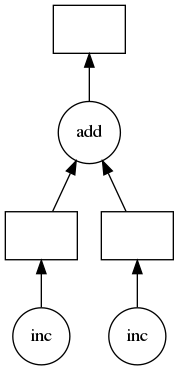

In [5]:
z.visualize()

In [6]:
%%time
z.compute()

CPU times: user 182 ms, sys: 33.7 ms, total: 215 ms
Wall time: 2.03 s


5

Outro exemplo...

In [7]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

Sequencial

In [8]:
%%time
results = []
for x in data:
    y = inc(x)
    results.append(y)
    
total = sum(results)

CPU times: user 526 ms, sys: 114 ms, total: 640 ms
Wall time: 8.01 s


In [10]:
%%time
results = []
for x in data:
    y = delayed(inc)(x)
    results.append(y)
total = delayed(sum)(results)

total.compute()

CPU times: user 159 ms, sys: 40.8 ms, total: 200 ms
Wall time: 2.03 s


44

## Numpy

<img src="https://docs.dask.org/en/latest/_images/dask-array-black-text.svg"/>

A implementação do dask **não** tem todas as funções do numpy, em especial as de algelin, do módulo `np.linalg`

In [12]:
import numpy as np
import dask.array as da

x = da.random.normal(10, 0.1, size=(20000, 20000),   # 400 million element array 
                              chunks=(1000, 1000))   # Cut into 1000x1000 sized chunks
y = x.mean(axis=0)[::100]

In [13]:
x.nbytes / 1e9

3.2

In [14]:
%%time
y.compute()

CPU times: user 1.16 s, sys: 1.71 ms, total: 1.17 s
Wall time: 5.31 s


array([10.00079705,  9.9991088 ,  9.9993088 ,  9.99810212,  9.99973912,
       10.00111224,  9.99942555, 10.00149671,  9.99975035,  9.9994341 ,
        9.99999166, 10.00032371,  9.99995854,  9.99937508, 10.00116641,
       10.00108964, 10.00073964,  9.99973717,  9.99953248,  9.9985482 ,
        9.99942199,  9.99809683, 10.00009757, 10.00052981, 10.0009276 ,
        9.99981387,  9.99995838, 10.00107348,  9.99983618, 10.00043241,
       10.00054955, 10.0004399 ,  9.99921703, 10.00083546,  9.99948155,
       10.00065258,  9.99983598,  9.99954136, 10.00115858,  9.99947672,
        9.99982209,  9.99979677,  9.99968547, 10.00007109,  9.99991484,
        9.99994218, 10.00054611, 10.00086194,  9.99920711, 10.00087801,
        9.99990676, 10.00043997,  9.99992816, 10.00122802,  9.99996398,
       10.00008517, 10.00085072,  9.99894358, 10.00009046, 10.00079971,
       10.00061104, 10.00057819, 10.00028019,  9.99946139,  9.9986413 ,
        9.99922619, 10.00029051,  9.99963845, 10.00014774, 10.00

In [15]:
%%time 
x = np.random.normal(10, 0.1, size=(20000, 20000)) 
y = x.mean(axis=0)[::100] 
y

CPU times: user 15.9 s, sys: 3.66 s, total: 19.5 s
Wall time: 24.8 s


array([ 9.99974329, 10.00046117, 10.00144896, 10.00044527, 10.00025004,
        9.99893373, 10.00065274, 10.00206822, 10.00033494,  9.99912414,
        9.99993752,  9.99989046,  9.99969507,  9.99959777,  9.99921708,
       10.00065665, 10.00075764,  9.99884207,  9.99875036,  9.99844512,
        9.99968861, 10.00002372, 10.00062879, 10.00021626,  9.99963063,
        9.99969367, 10.0000551 ,  9.99827883, 10.0002069 ,  9.99966662,
       10.00012355, 10.00094934, 10.00043165, 10.00071006,  9.99955284,
       10.00019957,  9.99848571,  9.99948792,  9.99919951, 10.00050605,
        9.99980763,  9.99956992, 10.00054643,  9.99946931,  9.99824777,
        9.99992938, 10.00066575, 10.00109949,  9.99954245, 10.00009661,
       10.00094357, 10.00034869, 10.0001836 , 10.00015784,  9.99914319,
        9.99997317,  9.99982879, 10.00087481,  9.99895788,  9.99958715,
        9.99876183, 10.00026824,  9.99929677, 10.00000267, 10.00097517,
        9.99959198,  9.99992664, 10.00033785, 10.00027133, 10.00

In [18]:
da.arange(50, chunks=5)

dask.array<arange, shape=(50,), dtype=int64, chunksize=(5,), chunktype=numpy.ndarray>

In [20]:
from dask.array import stats
a = da.random.uniform(size=(50,), chunks=(25,))
b = a + da.random.uniform(low=-0.15, high=0.15, size=(50,), chunks=(25,))
result = stats.ttest_rel(a, b)
result.compute()

Ttest_relResult(statistic=-2.171307539961463, pvalue=0.034778899135427796)

## Pandas

<img src="https://docs.dask.org/en/latest/_images/dask-dataframe.svg" width="500px"/>

In [21]:
import dask.dataframe as dd

In [23]:
df = dd.read_csv("MICRODADOS_ENEM_2019.csv", encoding="latin-1", sep=";")

In [24]:
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,2019,1506807,Santarém,15,PA,21,M,1,3,...,A,A,A,C,B,A,D,A,B,A
1,190001004628,2019,1504059,Mãe do Rio,15,PA,16,F,1,3,...,A,A,A,B,B,A,B,A,A,A
2,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,...,B,A,A,D,B,B,D,A,C,B
3,190001004630,2019,1507706,São Sebastião da Boa Vista,15,PA,23,M,0,3,...,A,A,A,C,A,A,D,A,A,A
4,190001004631,2019,1503903,Juruti,15,PA,23,M,1,3,...,A,A,A,B,A,A,D,A,A,A


In [29]:
for i in df.columns:
    print(i)

NU_INSCRICAO
NU_ANO
CO_MUNICIPIO_RESIDENCIA
NO_MUNICIPIO_RESIDENCIA
CO_UF_RESIDENCIA
SG_UF_RESIDENCIA
NU_IDADE
TP_SEXO
TP_ESTADO_CIVIL
TP_COR_RACA
TP_NACIONALIDADE
CO_MUNICIPIO_NASCIMENTO
NO_MUNICIPIO_NASCIMENTO
CO_UF_NASCIMENTO
SG_UF_NASCIMENTO
TP_ST_CONCLUSAO
TP_ANO_CONCLUIU
TP_ESCOLA
TP_ENSINO
IN_TREINEIRO
CO_ESCOLA
CO_MUNICIPIO_ESC
NO_MUNICIPIO_ESC
CO_UF_ESC
SG_UF_ESC
TP_DEPENDENCIA_ADM_ESC
TP_LOCALIZACAO_ESC
TP_SIT_FUNC_ESC
IN_BAIXA_VISAO
IN_CEGUEIRA
IN_SURDEZ
IN_DEFICIENCIA_AUDITIVA
IN_SURDO_CEGUEIRA
IN_DEFICIENCIA_FISICA
IN_DEFICIENCIA_MENTAL
IN_DEFICIT_ATENCAO
IN_DISLEXIA
IN_DISCALCULIA
IN_AUTISMO
IN_VISAO_MONOCULAR
IN_OUTRA_DEF
IN_GESTANTE
IN_LACTANTE
IN_IDOSO
IN_ESTUDA_CLASSE_HOSPITALAR
IN_SEM_RECURSO
IN_BRAILLE
IN_AMPLIADA_24
IN_AMPLIADA_18
IN_LEDOR
IN_ACESSO
IN_TRANSCRICAO
IN_LIBRAS
IN_TEMPO_ADICIONAL
IN_LEITURA_LABIAL
IN_MESA_CADEIRA_RODAS
IN_MESA_CADEIRA_SEPARADA
IN_APOIO_PERNA
IN_GUIA_INTERPRETE
IN_COMPUTADOR
IN_CADEIRA_ESPECIAL
IN_CADEIRA_CANHOTO
IN_CADEIRA_ACOLCHOADA
I

In [26]:
dfgp = df.groupby('TP_SEXO').max()

https://docs.dask.org/en/latest/dataframe-api.html

## Sklearn

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [32]:
X = df[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']]
y = df['TP_ESCOLA']

In [33]:
param_grid = {"C": [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
              "kernel": ['rbf', 'poly', 'sigmoid'],
              "shrinking": [True, False]}

grid_search = GridSearchCV(SVC(gamma='auto', random_state=0, probability=True),
                           param_grid=param_grid,
                           return_train_score=False,
                           iid=True,
                           cv=3,
                           n_jobs=-1)

In [ ]:
import joblib

with joblib.parallel_backend('dask'):
    grid_search.fit(X, y)